In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(file_paths):
    data_frames = []
    for path in file_paths:
        df = pd.read_csv(path)
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

In [3]:
file_paths_sex = ['./results/results9/Run1_TPR_sex.csv', './results/results21/Run2_TPR_sex.csv', './results/results25/Run3_TPR_sex.csv', './results/results35/Run4_TPR_sex.csv', './results/results42/Run5_TPR_sex.csv']  # Add more file paths as needed
file_paths_age = ['./results/results9/Run1_TPR_age_decile.csv', './results/results21/Run2_TPR_age_decile.csv', './results/results25/Run3_TPR_age_decile.csv', './results/results35/Run4_TPR_age_decile.csv', './results/results42/Run5_TPR_age_decile.csv']  # Add more file paths as needed


In [4]:
data_sex = read_data(file_paths_sex)
data_age = read_data(file_paths_age)

In [5]:
data_age

,Category,Total,Positive,Negative,GAP,Percentage
0,40-60,"[1080, 1080, 1080, 1080]","[137, 80, 208, 872]","[943, 1000, 872, 208]","[0.08759124087591241, 0.0, 0.07211538461538461...","[0.3959537572254335, 0.4, 0.4046692607003891, ..."
1,60-80,"[1820, 1820, 1820, 1820]","[128, 76, 192, 1628]","[1692, 1744, 1628, 192]","[0.09375, 0.0, 0.06770833333333333, 0.96683046...","[0.3699421965317919, 0.38, 0.3735408560311284,..."
2,80+,"[467, 467, 467, 467]","[68, 24, 88, 379]","[399, 443, 379, 88]","[0.07352941176470588, 0.0, 0.07954545454545454...","[0.19653179190751446, 0.12, 0.1712062256809338..."
3,20-40,"[310, 310, 310, 310]","[13, 20, 26, 284]","[297, 290, 284, 26]","[0.15384615384615385, 0.0, 0.07692307692307693...","[0.03757225433526012, 0.1, 0.05058365758754864..."
4,0-20,"[1, 1, 1, 1]","[0, 0, 0, 1]","[1, 1, 1, 0]","[0, 0, 0, 1.0]","[0.0, 0.0, 0.0, 0.0003160556257901391]"
5,60-80,"[1704, 1704, 1704, 1704]","[123, 119, 228, 1476]","[1581, 1585, 1476, 228]","[0.2926829268292683, 0.0, 0.2324561403508772, ...","[0.5082644628099173, 0.49583333333333335, 0.49..."
6,20-40,"[272, 272, 272, 272]","[6, 6, 12, 260]","[266, 266, 260, 12]","[0.0, 0.0, 0.25, 0.6730769230769231]","[0.024793388429752067, 0.025, 0.02608695652173..."
7,40-60,"[1058, 1058, 1058, 1058]","[58, 100, 156, 902]","[1000, 958, 902, 156]","[0.41379310344827586, 0.0, 0.20512820512820512...","[0.2396694214876033, 0.4166666666666667, 0.339..."
8,80+,"[448, 448, 448, 448]","[55, 15, 64, 384]","[393, 433, 384, 64]","[0.41818181818181815, 0.0, 0.40625, 0.6484375]","[0.22727272727272727, 0.0625, 0.13913043478260..."
9,0-20,"[8, 8, 8, 8]","[0, 0, 0, 8]","[8, 8, 8, 0]","[0, 0, 0, 0.5]","[0.0, 0.0, 0.0, 0.0026402640264026403]"


In [6]:
diseases = ['slvh', 'dlv', 'composite', 'no_finding']

In [7]:
# Function to safely evaluate strings containing lists
def safe_eval_list(data_str):
    try:
        return eval(data_str)
    except:
        return [None] * len(diseases)  # If eval fails, provide a list of None values

# Adjust the expand_data function to handle the string representation of lists in data_age
def expand_data(row, category_name):
    expanded_rows = []
    # Safely evaluate the strings to lists
    total = safe_eval_list(row['Total'])
    positive = safe_eval_list(row['Positive'])
    negative = safe_eval_list(row['Negative'])
    gap = safe_eval_list(row['GAP'])
    percentage = safe_eval_list(row['Percentage'])
    
    for i, disease in enumerate(diseases):
        # Use directly the list values
        expanded_row = {
            'Category': category_name,
            'Disease': disease,
            'Total': total[i],
            'Positive': positive[i],
            'Negative': negative[i],
            'GAP': gap[i],
            'Percentage': percentage[i]
        }
        expanded_rows.append(expanded_row)
        print(expanded_row)
    return expanded_rows

In [8]:
# Apply the expansion to age dataset
expanded_data_sex = [expand_data(row, row['Category']) for index, row in data_sex.iterrows()]

# Flatten the list of lists into a single list of dictionaries
expanded_data_sex = [item for sublist in expanded_data_sex for item in sublist]

# Convert list to DataFrame
expanded_df_sex = pd.DataFrame(expanded_data_sex)

# Display the new structure of the age data
expanded_df_sex

{'Category': 'F', 'Disease': 'slvh', 'Total': 1761, 'Positive': 172, 'Negative': 1589, 'GAP': 0.18023255813953487, 'Percentage': 0.49710982658959535}
{'Category': 'F', 'Disease': 'dlv', 'Total': 1761, 'Positive': 77, 'Negative': 1684, 'GAP': 0.0, 'Percentage': 0.385}
{'Category': 'F', 'Disease': 'composite', 'Total': 1761, 'Positive': 238, 'Negative': 1523, 'GAP': 0.15546218487394958, 'Percentage': 0.46303501945525294}
{'Category': 'F', 'Disease': 'no_finding', 'Total': 1761, 'Positive': 1523, 'Negative': 238, 'GAP': 0.9317137229152987, 'Percentage': 0.4813527180783818}
{'Category': 'M', 'Disease': 'slvh', 'Total': 1917, 'Positive': 174, 'Negative': 1743, 'GAP': 0.0, 'Percentage': 0.5028901734104047}
{'Category': 'M', 'Disease': 'dlv', 'Total': 1917, 'Positive': 123, 'Negative': 1794, 'GAP': 0.0, 'Percentage': 0.615}
{'Category': 'M', 'Disease': 'composite', 'Total': 1917, 'Positive': 276, 'Negative': 1641, 'GAP': 0.0, 'Percentage': 0.5369649805447471}
{'Category': 'M', 'Disease': 'no_

,Category,Disease,Total,Positive,Negative,GAP,Percentage
0,F,slvh,1761,172,1589,0.180233,0.497110
1,F,dlv,1761,77,1684,0.000000,0.385000
2,F,composite,1761,238,1523,0.155462,0.463035
3,F,no_finding,1761,1523,238,0.931714,0.481353
4,M,slvh,1917,174,1743,0.000000,0.502890
5,M,dlv,1917,123,1794,0.000000,0.615000
6,M,composite,1917,276,1641,0.000000,0.536965
7,M,no_finding,1917,1641,276,1.000000,0.518647
8,M,slvh,1668,104,1564,0.000000,0.429752
9,M,dlv,1668,137,1531,0.000000,0.570833


In [9]:
# Apply the expansion to age dataset
expanded_data_age = [expand_data(row, row['Category']) for index, row in data_age.iterrows()]

# Flatten the list of lists into a single list of dictionaries
expanded_data_age = [item for sublist in expanded_data_age for item in sublist]

# Convert list to DataFrame
expanded_df_age = pd.DataFrame(expanded_data_age)

# Display the new structure of the age data
expanded_df_age

{'Category': '40-60', 'Disease': 'slvh', 'Total': 1080, 'Positive': 137, 'Negative': 943, 'GAP': 0.08759124087591241, 'Percentage': 0.3959537572254335}
{'Category': '40-60', 'Disease': 'dlv', 'Total': 1080, 'Positive': 80, 'Negative': 1000, 'GAP': 0.0, 'Percentage': 0.4}
{'Category': '40-60', 'Disease': 'composite', 'Total': 1080, 'Positive': 208, 'Negative': 872, 'GAP': 0.07211538461538461, 'Percentage': 0.4046692607003891}
{'Category': '40-60', 'Disease': 'no_finding', 'Total': 1080, 'Positive': 872, 'Negative': 208, 'GAP': 0.9610091743119266, 'Percentage': 0.27560050568900124}
{'Category': '60-80', 'Disease': 'slvh', 'Total': 1820, 'Positive': 128, 'Negative': 1692, 'GAP': 0.09375, 'Percentage': 0.3699421965317919}
{'Category': '60-80', 'Disease': 'dlv', 'Total': 1820, 'Positive': 76, 'Negative': 1744, 'GAP': 0.0, 'Percentage': 0.38}
{'Category': '60-80', 'Disease': 'composite', 'Total': 1820, 'Positive': 192, 'Negative': 1628, 'GAP': 0.06770833333333333, 'Percentage': 0.37354085603

,Category,Disease,Total,Positive,Negative,GAP,Percentage
0,40-60,slvh,1080,137,943,0.087591,0.395954
1,40-60,dlv,1080,80,1000,0.000000,0.400000
2,40-60,composite,1080,208,872,0.072115,0.404669
3,40-60,no_finding,1080,872,208,0.961009,0.275601
4,60-80,slvh,1820,128,1692,0.093750,0.369942
...,...,...,...,...,...,...,...
95,20-40,no_finding,536,468,68,0.946581,0.143779
96,0-20,slvh,31,0,31,0.000000,0.000000
97,0-20,dlv,31,0,31,0.000000,0.000000
98,0-20,composite,31,0,31,0.000000,0.000000


In [10]:
def group_and_describe(data, group_field, summary_fields):
    grouped = data.groupby(group_field)
    summary = grouped[summary_fields].describe()
    return summary

def compute_confidence_intervals(df, mean_name, std_name, count_name, z=1.96):
    return df[mean_name], df[std_name] * z / np.sqrt(df[count_name])

def create_summary_df(diseases, data, gender):
    df_list = []
    for disease in diseases:
        mean = data.loc[disease, ('Gap_' + gender, 'mean')]
        ci = compute_confidence_intervals(data.loc[disease], ('Gap_' + gender, 'mean'), ('Gap_' + gender, 'std'), ('Gap_' + gender, 'count'))
        percentage_mean = data.loc[disease, ('%' + gender, 'mean')]
        df_list.append({'Disease': disease, 'Mean Gap': mean, 'CI': ci, '%': percentage_mean})
    return pd.DataFrame(df_list)


In [11]:
# Function to compute descriptive statistics and confidence intervals
def group_and_describe(data):
    grouped = data.groupby('Disease')
    description = grouped['GAP'].describe()
    description['CI'] = 1.96 * description['std'] / np.sqrt(description['count'])  # 95% CI
    return description

# Function to create summary dataframes for plotting
def create_summary_df(description):
    df_list = []
    for index, row in description.iterrows():
        df_list.append({
            'Disease': index,
            'Mean GAP': row['mean'],
            'CI': row['CI'],
            'Count': row['count']
        })
    return pd.DataFrame(df_list)

# Compute statistics for sex data
description_sex = group_and_describe(expanded_df_sex)
summary_df_sex = create_summary_df(description_sex)

# Compute statistics for age data
description_age = group_and_describe(expanded_df_age)
summary_df_age = create_summary_df(description_age)

In [12]:
description_sex

,count,mean,std,min,25%,50%,75%,max,CI
Disease,,,,,,,,,
composite,10.0,0.217206,0.316404,0.0,0.001087,0.120241,0.242910,1.000000,0.196109
dlv,10.0,0.295270,0.391373,0.0,0.000000,0.000000,0.654124,0.900990,0.242576
no_finding,10.0,0.812495,0.315688,0.0,0.804379,0.938953,0.999305,1.000000,0.195665
slvh,10.0,0.229578,0.339885,0.0,0.000000,0.051948,0.356900,0.994413,0.210663


In [13]:
summary_df_sex

,Disease,Mean GAP,CI,Count
0,composite,0.217206,0.196109,10.0
1,dlv,0.295270,0.242576,10.0
2,no_finding,0.812495,0.195665,10.0
3,slvh,0.229578,0.210663,10.0


In [14]:
description_age

,count,mean,std,min,25%,50%,75%,max,CI
Disease,,,,,,,,,
composite,25.0,0.226825,0.298693,0.0,0.031250,0.072165,0.250000,1.000000,0.117088
dlv,25.0,0.312459,0.373912,0.0,0.000000,0.032609,0.649573,1.000000,0.146573
no_finding,25.0,0.777807,0.280076,0.0,0.648438,0.945392,0.968338,1.000000,0.109790
slvh,25.0,0.194142,0.235269,0.0,0.000000,0.087591,0.375000,0.833333,0.092225


In [15]:
summary_df_age

,Disease,Mean GAP,CI,Count
0,composite,0.226825,0.117088,25.0
1,dlv,0.312459,0.146573,25.0
2,no_finding,0.777807,0.109790,25.0
3,slvh,0.194142,0.092225,25.0


In [16]:
def plot_age_disparity_size_corrected(plot_data, age_categories, disease_names, title):
    plt.figure(figsize=(18, 6))
    color_map = ['orange', 'green', 'red', 'purple', 'blue']  # Colors for each age category

    data_for_df = []

    # Ensuring we have enough markers and colors
    if len(color_map) < len(age_categories):
        raise ValueError("Not enough markers or colors specified for the number of age categories.")
    
    total_counts = {age: plot_data[age]['Total'].sum() for age in age_categories}
    sorted_ages = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)

    for i, (age, _) in enumerate(sorted_ages):
        data = plot_data[age]
        for disease in disease_names:
            disease_data = data[data['Disease'] == disease]

            mean_gap = disease_data['GAP'].mean()
            std_gap = disease_data['GAP'].std() / np.sqrt(disease_data['Positive'].sum())
            
            total_size = disease_data['Total'].sum()

            # Append the metrics for DataFrame
            data_for_df.append({
                'Disease': disease,
                'Age Group': age,
                'Mean GAP': mean_gap,
                'STD GAP': std_gap,
                'Total': total_size
            })
            
            plt.scatter(disease, mean_gap, color=color_map[i],s=total_size/(3403 *len(sorted_ages))* 250, 
                         label=f"{age}" if disease == disease_names[0] else "")
            
            plt.errorbar(disease,mean_gap,yerr=1.96 * std_gap,color=color_map[i])

    # Creating DataFrame
    pd.DataFrame(data_for_df).to_csv(f"./results/{title}_Stats.csv", index=False)

    plt.xlabel("Disease Label")
    plt.xticks(rotation=45)
    plt.ylabel(f"TPR {title} Disparity")
    plt.legend(title=title, bbox_to_anchor=(1.1, 1), fontsize='x-large', markerscale=0.9, title_fontsize='x-large')
    plt.grid(True)
    plt.title(label=f"TPR Disparity by {title} Across Diseases (Size Proportional to Total Cases)")
    plt.savefig(f"./results/{title}_TPRDisp.pdf")
    plt.show()

/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9847/2599845341.py:20: RuntimeWarning: invalid value encountered in scalar divide
  std_gap = disease_data['GAP'].std() / np.sqrt(disease_data['Positive'].sum())
/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


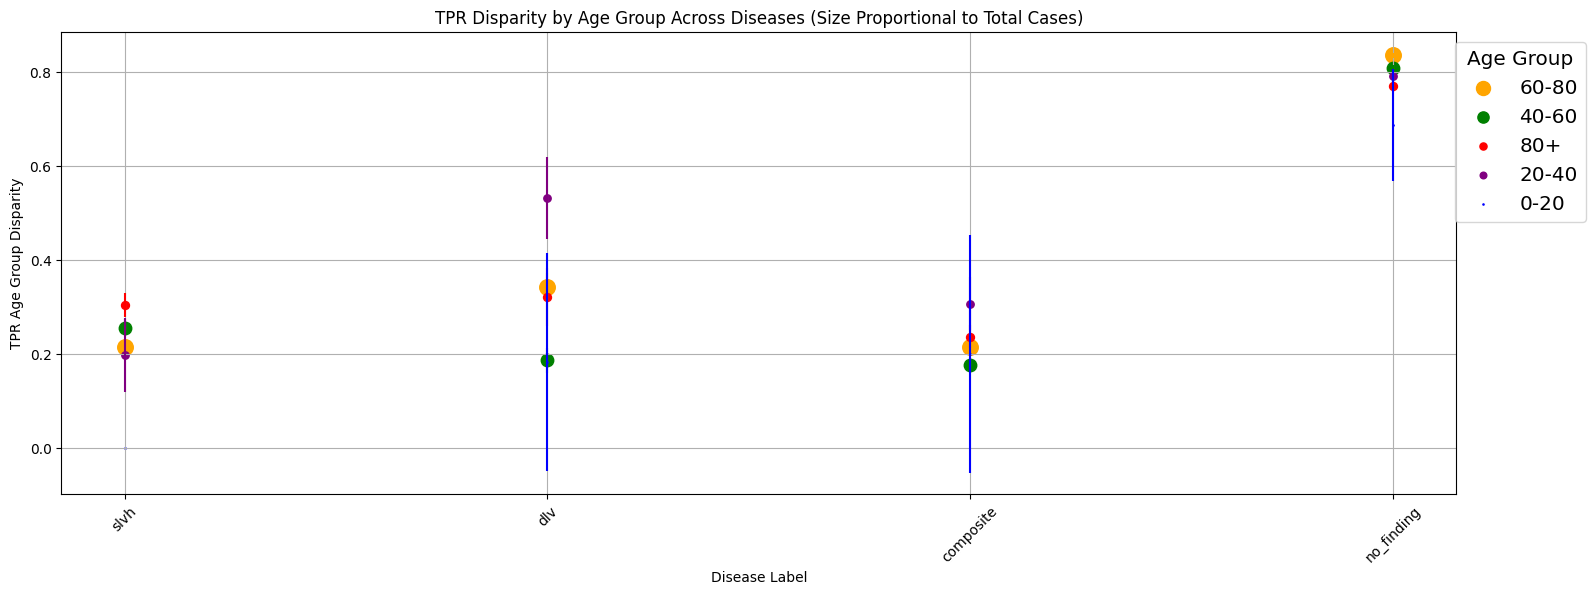

In [17]:
age_categories = expanded_df_age['Category'].unique()
disease_names = expanded_df_age['Disease'].unique()

# Preparing the data for plotting
plot_data = {age: expanded_df_age[expanded_df_age['Category'] == age] for age in age_categories}

plot_age_disparity_size_corrected(plot_data, age_categories, disease_names, "Age Group")

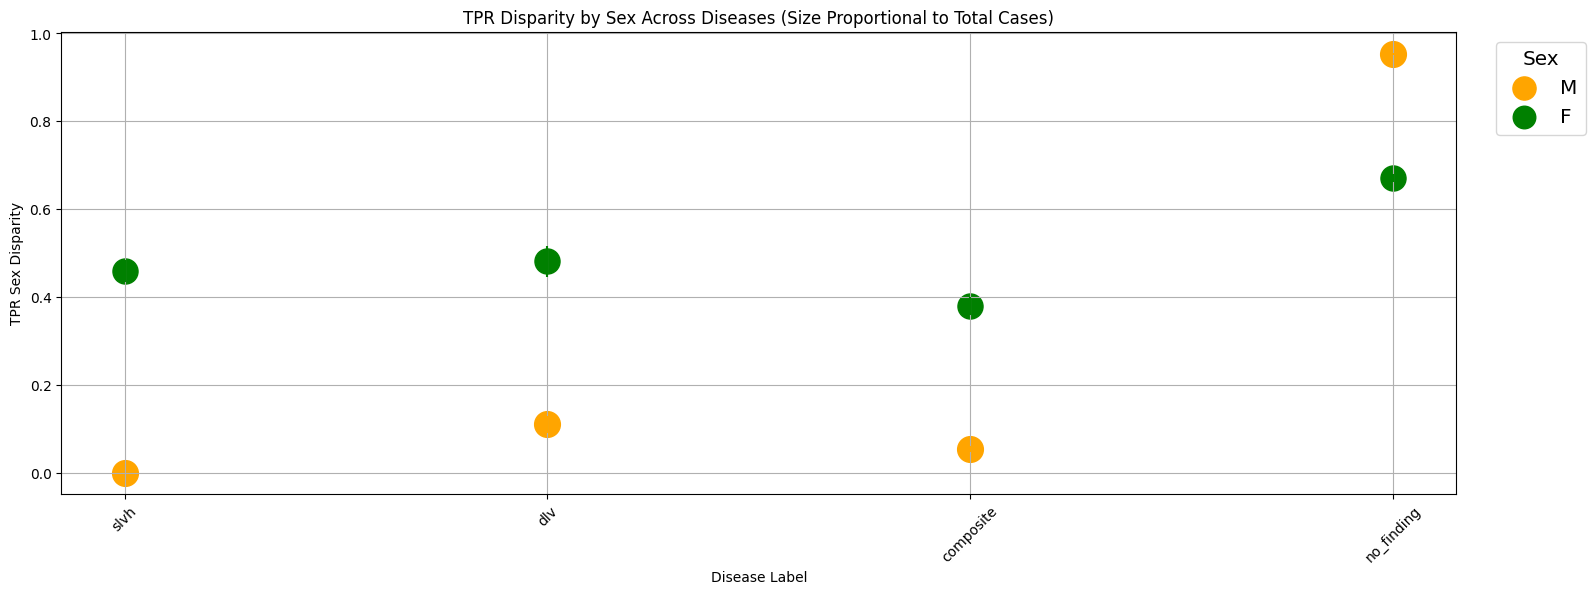

In [18]:
expanded_df_sex.dropna(subset=['Category'], inplace=True)
expanded_df_sex['GAP'] = pd.to_numeric(expanded_df_sex['GAP'], errors='coerce').fillna(0)
expanded_df_sex['Total'] = pd.to_numeric(expanded_df_sex['Total'], errors='coerce').fillna(0)

sex_categories = expanded_df_sex['Category'].unique()
disease_names = expanded_df_sex['Disease'].unique()

# Preparing the data for plotting
plot_data = {sex: expanded_df_sex[expanded_df_sex['Category'] == sex] for sex in sex_categories}

plot_age_disparity_size_corrected(plot_data, sex_categories, disease_names, "Sex")

In [32]:
correlation ={}
P ={}

In [33]:
def get_stats(new_stats, correlation, P):

    names = {
        "M": "Male",
        "F": "Female"
    }

    # Group data by 'Age Group' and calculate correlation within each group
    for group in new_stats['Age Group'].unique():
        subgroup_data = new_stats[(new_stats['Age Group'] == group)]
        
        # Calculate Pearson correlation for Mean GAP and STD GAP within each age group
        corr, p_value = stats.pearsonr(subgroup_data['Mean GAP'], subgroup_data['STD GAP'])
        
        # Formatting the group name for display
        group_name = names[group] if group in names else group
        correlation[group_name] = round(corr, 4)
        P[group_name] = round(p_value, 4)
        
        print(f"{group_name} has a correlation of {corr} and p-value of {p_value}")

In [34]:
sex_stats = pd.read_csv("./results/Sex_Stats.csv")

get_stats(sex_stats, correlation, P)

sex_stats

Male has a correlation of -0.27643885708089033 and p-value of 0.7235611429191096
Female has a correlation of -0.5899029852429394 and p-value of 0.4100970147570606


,Disease,Age Group,Mean GAP,STD GAP,Total
0,slvh,M,0.000000,0.000000,9341
1,dlv,M,0.109615,0.009965,9341
2,composite,M,0.054441,0.003299,9341
3,no_finding,M,0.953876,0.001133,9341
4,slvh,F,0.459156,0.012404,8864
5,dlv,F,0.480925,0.018431,8864
6,composite,F,0.379971,0.010648,8864
7,no_finding,F,0.671115,0.004648,8864


In [35]:
# Load the dataset
age_stats = pd.read_csv("./results/Age Group_Stats.csv")

get_stats(age_stats, correlation, P)

age_stats


60-80 has a correlation of -0.5302898543782201 and p-value of 0.46971014562178004
40-60 has a correlation of -0.7350793297808809 and p-value of 0.26492067021911914
80+ has a correlation of -0.48592051941865916 and p-value of 0.5140794805813409
20-40 has a correlation of -0.6796439448252931 and p-value of 0.3203560551747069
0-20 has a correlation of 0.12830669159412478 and p-value of 0.8716933084058751


,Disease,Age Group,Mean GAP,STD GAP,Total
0,slvh,60-80,0.214915,0.006687,8525
1,dlv,60-80,0.341370,0.015712,8525
2,composite,60-80,0.214037,0.008174,8525
3,no_finding,60-80,0.835390,0.002672,8525
4,slvh,40-60,0.255007,0.009347,5479
5,dlv,40-60,0.185617,0.013149,5479
6,composite,40-60,0.176929,0.006570,5479
7,no_finding,40-60,0.807008,0.003737,5479
8,slvh,80+,0.303350,0.013176,2220
9,dlv,80+,0.320425,0.031634,2220


In [36]:
correlation

{'Male': -0.2764,
 'Female': -0.5899,
 '60-80': -0.5303,
 '40-60': -0.7351,
 '80+': -0.4859,
 '20-40': -0.6796,
 '0-20': 0.1283}

In [37]:
P

{'Male': 0.7236,
 'Female': 0.4101,
 '60-80': 0.4697,
 '40-60': 0.2649,
 '80+': 0.5141,
 '20-40': 0.3204,
 '0-20': 0.8717}

In [38]:
# Pivoting the table to match the required format
pivoted_df = sex_stats.pivot(index="Disease", columns="Age Group", values=["Mean GAP", "STD GAP", "Total"])

# Confidence intervals for M
pivoted_df['CI_M'] = pivoted_df[('Mean GAP', 'M')].apply(
    lambda x: stats.norm.interval(0.95, loc=x, scale=pivoted_df[('STD GAP', 'M')]/pivoted_df[('Total', 'M')].apply(lambda n: n**0.5))
)

# Confidence intervals for F
pivoted_df['CI_F'] = pivoted_df[('Mean GAP', 'F')].apply(
    lambda x: stats.norm.interval(0.95, loc=x, scale=pivoted_df[('STD GAP', 'F')]/pivoted_df[('Total', 'F')].apply(lambda n: n**0.5))
)

# Creating the final table with specified headers
final_table = pivoted_df.reset_index()
final_table.columns = ['Disease', 'Gap_M_mean', 'Gap_F_mean', 'CI_M', 'CI_F', 'Total_M', 'Total_F', 'CI_M', 'CI_F']

# Display the final structured DataFrame
sex_table_stats = final_table[['Disease', 'Gap_M_mean', 'CI_M', 'Gap_F_mean', 'CI_F']]

sex_table_stats['Distance'] = sex_table_stats.apply(lambda row: abs(row['Gap_M_mean'] - row['Gap_F_mean']), axis=1)
round(sex_table_stats,3)


/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_9847/3385550678.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_table_stats['Distance'] = sex_table_stats.apply(lambda row: abs(row['Gap_M_mean'] - row['Gap_F_mean']), axis=1)


,Disease,Gap_M_mean,CI_M,CI_M,Gap_F_mean,CI_F,CI_F,Distance
0,composite,0.380,0.011,"([0.0543740895104013, 0.054238910578809016, 0....",0.054,0.003,"([0.37974913532530163, 0.37958710259314926, 0....",0.326
1,dlv,0.481,0.018,"([0.1095484803369661, 0.10941330140537382, 0.1...",0.110,0.010,"([0.48070294987531226, 0.4805409171431599, 0.4...",0.371
2,no_finding,0.671,0.005,"([0.9538087275378611, 0.9536735486062687, 0.95...",0.954,0.001,"([0.6708929932414366, 0.6707309605092842, 0.67...",0.283
3,slvh,0.459,0.012,"([-6.690427841850573e-05, -0.00020208321001078...",0.000,0.000,"([0.45893449860482655, 0.4587724658726742, 0.4...",0.459


In [39]:
print("Average Distance:",round(sex_table_stats["Distance"].mean(),3))
print("Count female with positive gap:",len(sex_table_stats.loc[(sex_table_stats.Gap_F_mean >= 0)]))
print("Count male with positive gap  :",len(sex_table_stats.loc[(sex_table_stats.Gap_M_mean >= 0)]))

Average Distance: 0.36
Count female with positive gap: 4
Count male with positive gap  : 4


In [40]:
# Pivoting the table to match the required format
pivoted_df = age_stats.pivot(index="Disease", columns="Age Group", values=["Mean GAP", "STD GAP", "Total"])

# Calculate confidence intervals
for age in ['60-80', '40-60', '80+', '20-40', '0-20']:
    mean_col = ('Mean GAP', age)
    std_col = ('STD GAP', age)
    total_col = ('Total', age)
    ci_col = 'CI_' + age
    z_score = stats.norm.ppf(0.975)  # for a 95% confidence interval
    pivoted_df[ci_col] = pivoted_df.apply(lambda row: (row[mean_col] - z_score * (row[std_col] / np.sqrt(row[total_col])),
                                                      row[mean_col] + z_score * (row[std_col] / np.sqrt(row[total_col]))), axis=1)

# If it's a MultiIndex, you can flatten it like this:
flat_columns = ['Disease'] + ['_'.join(col).strip() for col in pivoted_df.columns.to_flat_index()]


age_final_table = pivoted_df.reset_index()
age_final_table.columns = flat_columns


# Identifying columns that contain the mean values, assumed to be named 'Gap_*_mean'
mean_columns = [col for col in age_final_table.columns if 'Mean' in col]

# Calculate the 'Distance' by taking the max and min across these mean columns for each row
age_final_table['Distance'] = age_final_table[mean_columns].apply(lambda row: row.max() - row.min(), axis=1)
round(age_final_table, 3)


,Disease,Mean GAP_0-20,Mean GAP_20-40,Mean GAP_40-60,Mean GAP_60-80,Mean GAP_80+,STD GAP_0-20,STD GAP_20-40,STD GAP_40-60,STD GAP_60-80,...,Total_20-40,Total_40-60,Total_60-80,Total_80+,CI_60-80_,CI_40-60_,CI_80+_,CI_20-40_,CI_0-20_,Distance
0,composite,0.200,0.307,0.177,0.214,0.236,0.129,0.028,0.007,0.008,...,1917.0,5479.0,8525.0,2220.0,"(0.21386301929362087, 0.21421006125859912)","(0.17675527578201639, 0.1771031935175444)","(0.23584066794723704, 0.23685986681212115)","(0.3055375472318981, 0.3080817249623533)","(0.1683712172029585, 0.23162878279704152)",0.130
1,dlv,0.183,0.532,0.186,0.341,0.320,0.118,0.045,0.013,0.016,...,1917.0,5479.0,8525.0,2220.0,"(0.34103665689461254, 0.3417037046210361)","(0.18526843076778515, 0.18596476305984905)","(0.3191091662178457, 0.32174097184591455)","(0.5295432956876646, 0.5335519424075735)","(0.15434028243604528, 0.2123263842306213)",0.348
2,no_finding,0.687,0.791,0.807,0.835,0.769,0.061,0.006,0.004,0.003,...,1917.0,5479.0,8525.0,2220.0,"(0.8353336696091546, 0.8354471027277243)","(0.8069092167019277, 0.8071071430791364)","(0.7683458286924375, 0.768881194268625)","(0.7906382763851919, 0.79121609304107)","(0.6722425725011684, 0.7019509758859285)",0.148
3,slvh,0.000,0.197,0.255,0.215,0.303,0.000,0.040,0.009,0.007,...,1917.0,5479.0,8525.0,2220.0,"(0.21477349070959348, 0.21505739066956012)","(0.2547599364974079, 0.25525493007081546)","(0.3028020211776003, 0.3038981817200979)","(0.1956370186928652, 0.1992347761789296)","(0.0, 0.0)",0.303


In [41]:
age_final_table.to_csv("age_table.csv")

In [42]:
age_final_table["STD GAP_80+"]

0    0.012251
1    0.031634
2    0.006435
3    0.013176
Name: STD GAP_80+, dtype: float64

In [43]:
print("Average Distance:",round(age_final_table["Distance"].mean(),3))
print("Count 40-60 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_40-60'] >= 0)]))
print("Count 60-80 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_60-80'] >= 0)]))
print("Count 20-40 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_20-40'] >= 0)]))
print("Count 80- with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_80+'] >= 0)]))
print("Count 0-20 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_0-20'] >= 0)]))

Average Distance: 0.232
Count 40-60 with positive gap: 4
Count 60-80 with positive gap: 4
Count 20-40 with positive gap: 4
Count 80- with positive gap: 4
Count 0-20 with positive gap: 4
